In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import scipy.stats as stat
import statistics


In [2]:
# assigns umbrella parameters to create larger, higher-quality plots
plt.rcParams['figure.figsize'] = 20,10
plt.rcParams['font.size'] = 24

In [4]:
## the platte coordinates create a line that approximately depicts the Platte River as it passes through South Denver
## this is the geographical barrier that divides 'East' and 'West' for the sake of this project
platte_coord = pd.read_csv('platte_points.csv', delimiter = ",") ## open csv file and assign to df variable
platte_range = len(platte_coord)
platte_coord.head()

,platte_lat,platte_long,significant_marker
0,39.745080,-105.015659,furthest_north
1,39.740467,-105.017396,colfax
2,39.734828,-105.017093,NaN
3,39.729358,-105.016777,eighth
4,39.725444,-105.015816,sixth


In [7]:
# these were included because data collection process changed halfway through for time's sake so GPS coordinates were inconsistent.
intersection_coord = (['Sheridan_&_Mississippi', 39.696828, -105.053217], # west
                      ['Federal_&_Jewell', 39.682268,-105.025056], # west
                      ['Sheridan_&_Alameda', 39.711351, -105.053253], # west
                      ['Sheridan_&_Colfax', 39.740374, -105.053219], # west
                      ['Federal_&_Mississippi', 39.696733, -105.025065], # west
                      ['Sheridan_&_Jewell', 39.682293, -105.053217], # west
                      ['Wadsworth_&_Mississippi', 39.696606, -105.081532], # west
                      ['Colorado_&_Mississippi', 39.696583, -104.940655], # east
                      ['Colorado_&_Colfax', 39.740133, -104.940689], # east
                      ['Havana_&_Sixth', 39.725597, -104.865922], # east
                      ['Broadway_&_Alameda', 39.711142, -104.987573], # east
                      ['Havana_&_Alameda', 39.711058, -104.865997], # east
                      ['Colorado_&_Alameda', 39.711592, -104.940774], #east
                      ['Havana_&_Jewell', 39.682033, -104.865903]) # east

# Sheridan_&_Mississippi|Federal_&_Jewell|Sheridan_&_Alameda|Sheridan_&_Colfax|Federal_&_Mississippi|Sheridan_&_Jewell|Wadsworth_&_Mississippi
                 
intersection_coord_df = pd.DataFrame(intersection_coord, columns = ["intersection", "latitude", "longitude"]) #shift to dataframe for compatability
intersection_coord_df.head() #

,intersection,latitude,longitude
0,Sheridan_&_Mississippi,39.696828,-105.053217
1,Federal_&_Jewell,39.682268,-105.025056
2,Sheridan_&_Alameda,39.711351,-105.053253
3,Sheridan_&_Colfax,39.740374,-105.053219
4,Federal_&_Mississippi,39.696733,-105.025065


In [8]:
storefront_data = pd.read_csv('storefront_data.csv', delimiter = ",") # inculde
storefront_data.head()

,side_of_platte,intersection,latitude,longitude,maintitle,maintitle_code,subtitle(optional),subtitle_code
0,west,Sheridan_&_Mississippi,39.696934,-105.053781,Sol Maya Tattoo,spangl,NaN,NaN
1,west,Sheridan_&_Mississippi,39.696826,-105.054102,Alameda Burrito,spangl,NaN,engl
2,west,Sheridan_&_Mississippi,39.696899,-105.053398,Poncho's Family mexican Restaurant,spangl,NaN,transl
3,west,Sheridan_&_Mississippi,39.696678,-105.053415,7 Eleven; Fast Cash Pawn,engl,NaN,NaN
4,west,Sheridan_&_Mississippi,39.696781,-105.052643,uHaul,engl,NaN,engl


In [9]:
intersection = intersection_coord[0][0]
engl = storefront_data[storefront_data['maintitle'].str.contains("engl", na=False)]
# en(intersection_coord[0].isin(engl['intersection']))

In [10]:
# map the storefronts' maintitles by language use code
maintitle_engl = storefront_data[storefront_data["maintitle_code"].str.contains("engl", na = False)] #for some reason you have to manually set na to be a false value
maintitle_span = storefront_data[storefront_data["maintitle_code"].str.contains("span", na = False)]
maintitle_spangl = storefront_data[storefront_data["maintitle_code"].str.contains("spangl", na = False )]
maintitle_transl = storefront_data[storefront_data["maintitle_code"].str.contains("transl", na = False)]

# map the storefronts' subtitles by language use code
subtitle_engl = storefront_data[storefront_data["subtitle_code"].str.contains("engl", na = False)]
subtitle_span = storefront_data[storefront_data["subtitle_code"].str.contains("span", na = False)]
subtitle_spangl = storefront_data[storefront_data["subtitle_code"].str.contains("spangl", na = False)]
subtitle_transl = storefront_data[storefront_data["subtitle_code"].str.contains("transl", na = False)]
subtitle_mix = storefront_data[storefront_data["subtitle_code"].str.contains("mix", na = False)]

In [13]:
platte_lat = platte_coord['platte_lat'] ## assign specific columns to individual variables 
platte_long = platte_coord['platte_long']
far_west = -105.125120 # these points are to be used as the East/West limiters on the map since the Platte only gives us info about north/south
far_east = -104.858379

In [14]:
colfax_lat = (platte_lat[1]) # furthest north main street of the study space
hampden_lat = (platte_lat[21]) # furthest south main street of the study space
kipling_long = -105.116847 # furthest west main street of study space
havana_long = -104.865975 # furthest east main street of study space
print(colfax_lat)
print(hampden_lat)

39.740466999999995
39.653612


In [15]:
df_size = len(intersection_coord_df)
size_arr = np.empty((df_size,1))
size_df = pd.DataFrame(size_arr, columns = ['size'])

title_type = 'maintitle_code'
lang_code = 'spangl'

for i in range(df_size): # you won't regret commenting your own code // you must index to the specific column, 
        # otherwise pandas takes i as something else
    
        intersection = intersection_coord_df['intersection'][i]
        
        # intersection = i # the for loop takes the row index in the column 'intersection' on each iteration
    
        inter_spec_storefront = storefront_data[storefront_data['intersection'].str.contains(intersection)] # for each iteration, a new array type dataset
        # is created for only the data entries on storefront_data that contain the intersection string in its 'intersection' column
    
        is_lang_code = inter_spec_storefront[title_type] == lang_code # filters by only the rows that contain the specific lang code (e.g. 'engl', 'span', etc.)
        
        lang_select = inter_spec_storefront[is_lang_code] # takes the boolean values of is_lang_code and uses them to filter out only the rows that contain the lang code
        
        data_size = len(lang_select) # measure the number of occurances for this lang_code for this intersection iteration!!!!
        
        # print(data_size)
        
        # print(intersection)
        
        size_df['size'][i] = data_size


pd.concat([intersection_coord_df, size_df], axis=1)            

,intersection,latitude,longitude,size
0,Sheridan_&_Mississippi,39.696828,-105.053217,3.0
1,Federal_&_Jewell,39.682268,-105.025056,0.0
2,Sheridan_&_Alameda,39.711351,-105.053253,3.0
3,Sheridan_&_Colfax,39.740374,-105.053219,0.0
4,Federal_&_Mississippi,39.696733,-105.025065,1.0
5,Sheridan_&_Jewell,39.682293,-105.053217,0.0
6,Wadsworth_&_Mississippi,39.696606,-105.081532,0.0
7,Colorado_&_Mississippi,39.696583,-104.940655,0.0
8,Colorado_&_Colfax,39.740133,-104.940689,0.0
9,Havana_&_Sixth,39.725597,-104.865922,0.0


In [16]:
def concat_lang_size(storefront_data, intersection_coord_df, title_type, lang_code, column_name):
    """
    This function takes the two dataframes--the main dataframe with all of the storefront linguistic landscape data, 
    as well as the intersection dataframe that has the lat and long of each intersection--and it creates a new dataframe
    that concatenates the intersection coord dataframe with the size (i.e. frequency) of a specific language type and code.
    
    Parameters
    -----------
    
    :storefront_data: DataFrame: a dataframe with columns intersection name, and language code
    :intersection_coord_df: DataFrame: a dataframe with intersection name, as well as latitudnal and longitudnal data for that intersection
    :title_type: str: maintitle_code or subtitle_code
    :lang_code: str: a code that signifies a specific language type (e.g. span for Spanish, spangl for Spanglish, etc.)
    :column_name: str: name of the new column to be concatenated onto the DataGrame
    
    :returns: a concatenated DataFrame with frequency respective to the intersection row
    :rtype: pandas DataFrame
    
    """
    
    df_size = len(intersection_coord_df)
    size_arr = np.empty((df_size,1))
    size_df = pd.DataFrame(size_arr, columns = [column_name])

    for i in range(df_size): # you won't regret commenting your own code // you must index to the specific column, 
        # otherwise pandas takes i as something else
    
        intersection = intersection_coord_df['intersection'][i]
        
        # intersection = i # the for loop takes the row index in the column 'intersection' on each iteration
    
        inter_spec_storefront = storefront_data[storefront_data['intersection'].str.contains(intersection)] # for each iteration, a new array type dataset
        # is created for only the data entries on storefront_data that contain the intersection string in its 'intersection' column
    
        is_lang_code = inter_spec_storefront[title_type].str.contains(lang_code, na=False) # filters by only the rows that contain the specific lang code (e.g. 'engl', 'span', etc.)
        
        lang_select = inter_spec_storefront[is_lang_code] # takes the boolean values of is_lang_code and uses them to filter out only the rows that contain the lang code
        
        data_size = len(lang_select) # measure the number of occurances for this lang_code for this intersection iteration!!!!
        
        # print(data_size)
        
        # print(intersection)
        
        size_df[column_name][i] = data_size # assign
        
    concated_df = pd.concat([intersection_coord_df, size_df], axis=1)
    
    return(concated_df)
    
        

In [20]:
def plot_on_platte_singletitle(dataframe, label_name, column_name, multiplier):
    """
    Allows me to easily pass specific Dataframes and to have them mapped on the platte river with bubble sizes that represent
    the use of the Dataframe's specific language type relative to the other intersections. 
    
    Parameters
    -----------
    
    :dataframe: DataFrame: a dataframe of type that would be returned by the concat_lang_size function, with intersection name, 
    latitudnal and longitudnal data, and frequency of language_type occurance at that intersection
    
    :label_name: str: what to put on the legend (i.e. "Spanish" if span is being plotted)
    :column_name: str: use the column that is concated by concat_lang_size function. likely called "size", it refers to frequency and will be used
    for the 'z' variable on the matplotlib scatterplot
    
    :multiplier: a multiplier that allows the scales to be visible with smaller datasets
    
    Returns
    --------
    
    :returns: matplotlib plot with platte river, lines for the north and southern most streets, as well as bubbles with size proportional to total
    :rtype: matplotlibfig
    
    
    """
    plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
    plt.xlim(far_west,far_east) # xlim is read (left,right)
    plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
    plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
    plt.scatter(dataframe["longitude"], dataframe["latitude"], (dataframe[column_name] * multiplier), label = label_name)
    
    plt.legend()
    plt.show()

In [18]:
def plot_on_platte_doubletitle(dataframe, label_name, column_name1, column_name2, multiplier):
    """
    allows me to easily pass specific dataframes and to have them mapped on the platte river
    
    """
    plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
    plt.xlim(far_west,far_east) # xlim is read (left,right)
    plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
    plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
    plt.scatter(dataframe["longitude"], dataframe["latitude"], ((dataframe[column_name1] + dataframe[column_name2]) * multiplier), label = label_name)
    
    plt.legend()
    plt.show()

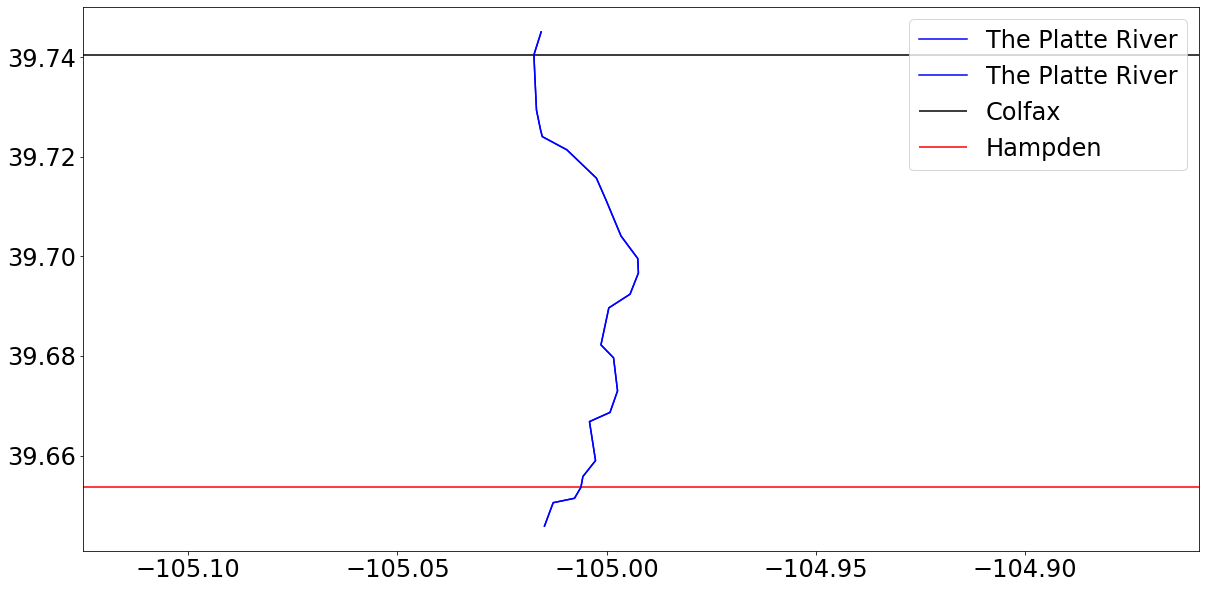

In [19]:
plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
platte = plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
plt.xlim(far_west,far_east) # xlim is read (left,right)
plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
    

df_size = len(intersection_coord_df)
for i in range(df_size):
    intersection_latitude = intersection_coord_df["latitude"][i]
    intersection_longitude = intersection_coord_df["longitude"][i]
    for i in range(platte_range):
        if i > 0:
            platte_latitude = platte_coord["platte_lat"][i]
            if intersection_latitude < platte_latitude:
                lower_bounds = ( platte_coord['platte_long'][i], platte_latitude)
                upper_bounds = (platte_coord["platte_long"][i-1], platte_coord["platte_lat"][i-1])
            else:
                break
    
            
        
    #plt.hlines(intersection_coord_df["latitude"],intersection_coord_df["longitude"], platte(intersection_coord_df["latitude"][i]))
    

#plt.scatter(dataframe["longitude"], dataframe["latitude"], (dataframe[column_name] * multiplier), label = label_name)
    
plt.legend()
plt.show()

In [41]:
spangl_df_maintitle = concat_lang_size(storefront_data,intersection_coord_df, 'maintitle_code', 'spangl', 'maintitle_size')
spangl_df = concat_lang_size(storefront_data, spangl_df_maintitle, 'subtitle_code', 'spangl', 'subtitle_size')

span_df_maintitle = concat_lang_size(storefront_data, intersection_coord_df, 'maintitle_code', 'span', 'maintitle_size')
span_df = concat_lang_size(storefront_data, span_df_maintitle, 'subtitle_code', 'span', 'subtitle_size')

engl_df_maintitle = concat_lang_size(storefront_data, intersection_coord_df, 'maintitle_code', 'engl', 'maintitle_size')
engl_df = concat_lang_size(storefront_data, engl_df_maintitle, 'subtitle_code', 'engl', 'subtitle_size')

mix_df_maintitle = concat_lang_size(storefront_data, intersection_coord_df, 'maintitle_code', 'mix', 'maintitle_size')
mix_df = concat_lang_size(storefront_data, mix_df_maintitle, 'subtitle_code', 'mix', 'subtitle_size')

transl_df_maintitle = concat_lang_size(storefront_data, intersection_coord_df, 'maintitle_code', 'transl', 'maintitle_size')
transl_df = concat_lang_size(storefront_data, transl_df_maintitle, 'subtitle_code', 'transl', 'subtitle_size')

other_df_maintitle = concat_lang_size(storefront_data, intersection_coord_df, 'maintitle_code', 'other', 'maintitle_size')
other_df = concat_lang_size(storefront_data, other_df_maintitle, 'subtitle_code', 'other', 'subtitle_size')

all_span_df_maintitle = concat_lang_size(storefront_data,intersection_coord_df, 'maintitle_code', 'span|spangl|mix|transl', 'maintitle_size')
all_span_df = concat_lang_size(storefront_data, spangl_df_maintitle, 'subtitle_code', 'span|spangl|mix|transl', 'subtitle_size')
all_span_df

,intersection,latitude,longitude,maintitle_size,subtitle_size
0,Sheridan_&_Mississippi,39.696828,-105.053217,3.0,1.0
1,Federal_&_Jewell,39.682268,-105.025056,0.0,1.0
2,Sheridan_&_Alameda,39.711351,-105.053253,3.0,4.0
3,Sheridan_&_Colfax,39.740374,-105.053219,0.0,1.0
4,Federal_&_Mississippi,39.696733,-105.025065,1.0,1.0
5,Sheridan_&_Jewell,39.682293,-105.053217,0.0,0.0
6,Wadsworth_&_Mississippi,39.696606,-105.081532,0.0,1.0
7,Colorado_&_Mississippi,39.696583,-104.940655,0.0,0.0
8,Colorado_&_Colfax,39.740133,-104.940689,0.0,0.0
9,Havana_&_Sixth,39.725597,-104.865922,0.0,0.0


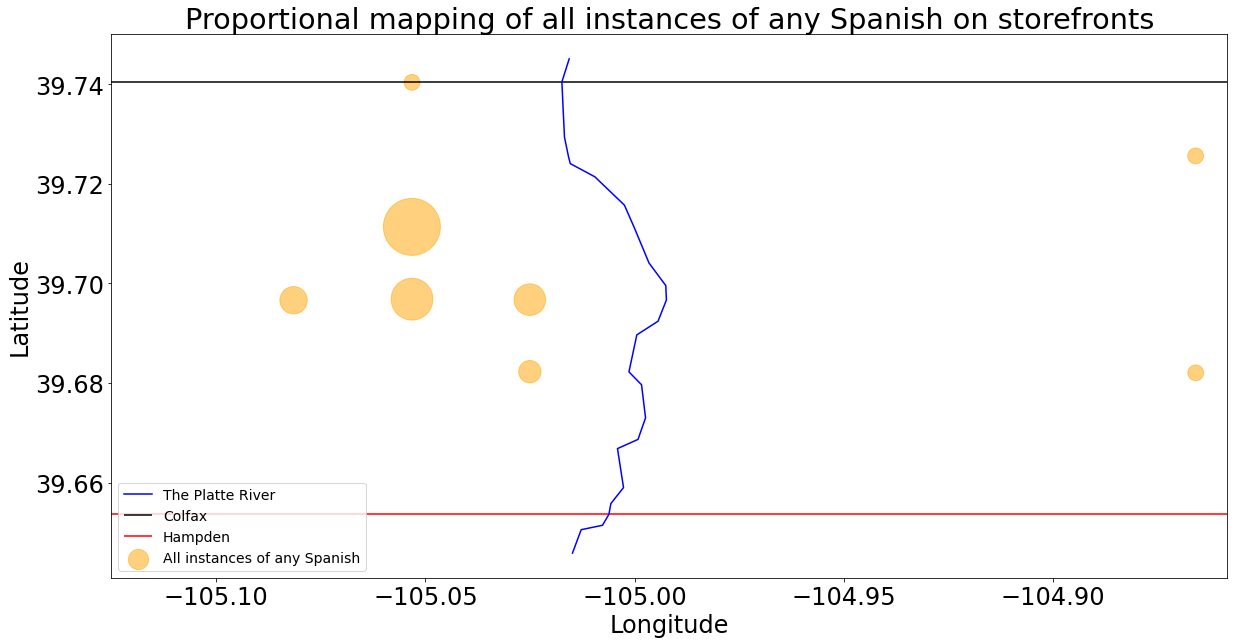

In [42]:
# Plot all instances of any type of Spanish whatsoever
multiplier = 250
label_name = "All instances of any Spanish"

plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
plt.xlim(far_west,far_east) # xlim is read (left,right)
plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
plt.scatter(span_df["longitude"], span_df["latitude"], ((span_df["maintitle_size"] + span_df["subtitle_size"] +
                                                        spangl_df["maintitle_size"] + spangl_df["subtitle_size"] +
                                                        mix_df["maintitle_size"] + mix_df["subtitle_size"] +
                                                        transl_df["maintitle_size"] + transl_df["subtitle_size"]) * multiplier), c = "orange", label = label_name, alpha = 0.5)

plt.title("Proportional mapping of all instances of any Spanish on storefronts") # this includes Spanish, Spanglish, translation, and mixed use
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc = 3, fontsize = 14, markerscale = 0.5)
plt.savefig("spanish_instances")
plt.show()

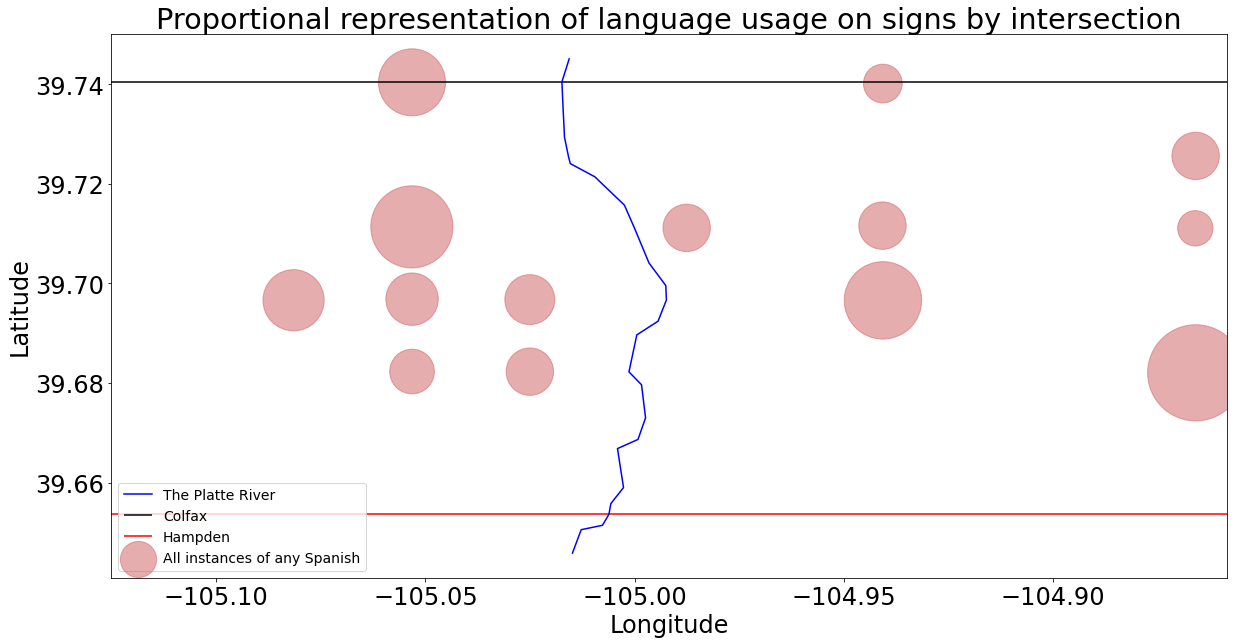

In [40]:
# Proportional representation of language usage by intersection
multiplier = 250
label_name = "All instances of any Spanish"

plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
plt.xlim(far_west,far_east) # xlim is read (left,right)
plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
plt.scatter(span_df["longitude"], span_df["latitude"], ((span_df["maintitle_size"] + span_df["subtitle_size"] +
                                                        spangl_df["maintitle_size"] + spangl_df["subtitle_size"] +
                                                        mix_df["maintitle_size"] + mix_df["subtitle_size"] +
                                                        transl_df["maintitle_size"] + transl_df["subtitle_size"] +
                                                        engl_df["maintitle_size"] + engl_df["subtitle_size"] +
                                                        other_df["maintitle_size"] + other_df["subtitle_size"])
                                                        * multiplier), c = "indianred", label = label_name, alpha = 0.5)

plt.title("Proportional representation of language usage on signs by intersection") # this includes Spanish, Spanglish, translation, and mixed use
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc = 3, fontsize = 14, markerscale = 0.5)
plt.savefig("proportional_lang_use")
plt.show()

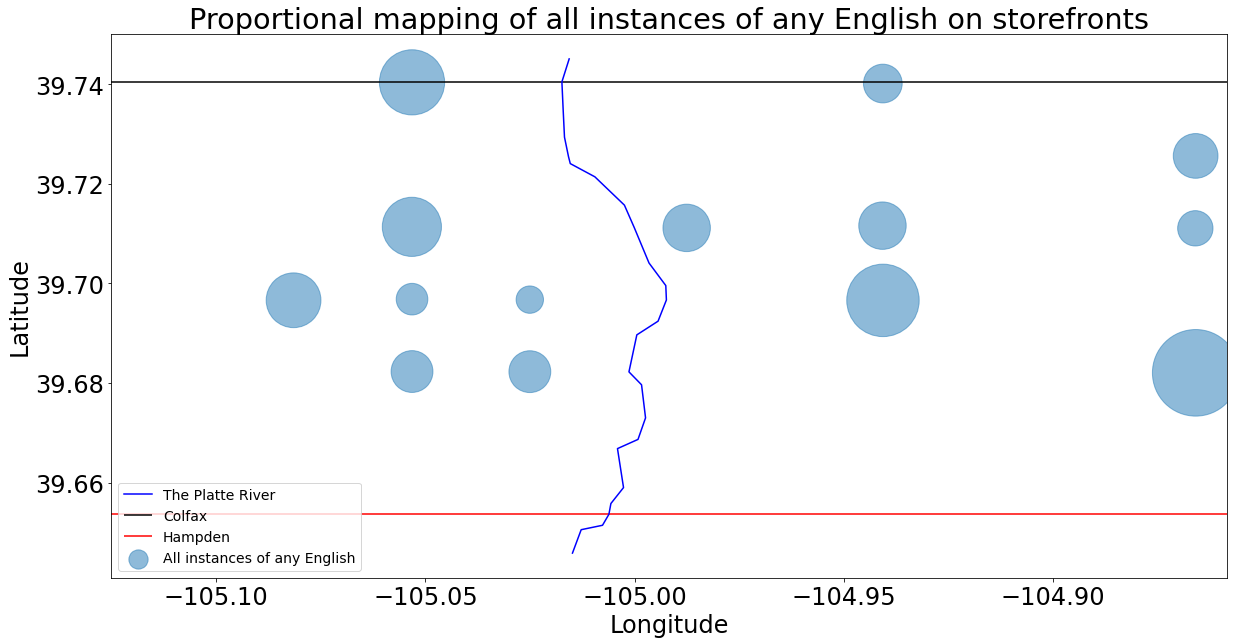

In [96]:
# Plot all instances of any type of English whatsoever
multiplier = 250
alpha = 0.5
label_name = "All instances of any English"

plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
plt.xlim(far_west,far_east) # xlim is read (left,right)
plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
plt.scatter(engl_df["longitude"], engl_df["latitude"], ((engl_df["maintitle_size"] + engl_df["subtitle_size"]) * multiplier), label = label_name, alpha=alpha)

plt.title("Proportional mapping of all instances of any English on storefronts")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
    
plt.legend(loc = 3, fontsize = 14, markerscale = 0.3)
plt.savefig("english_instances")
plt.show()

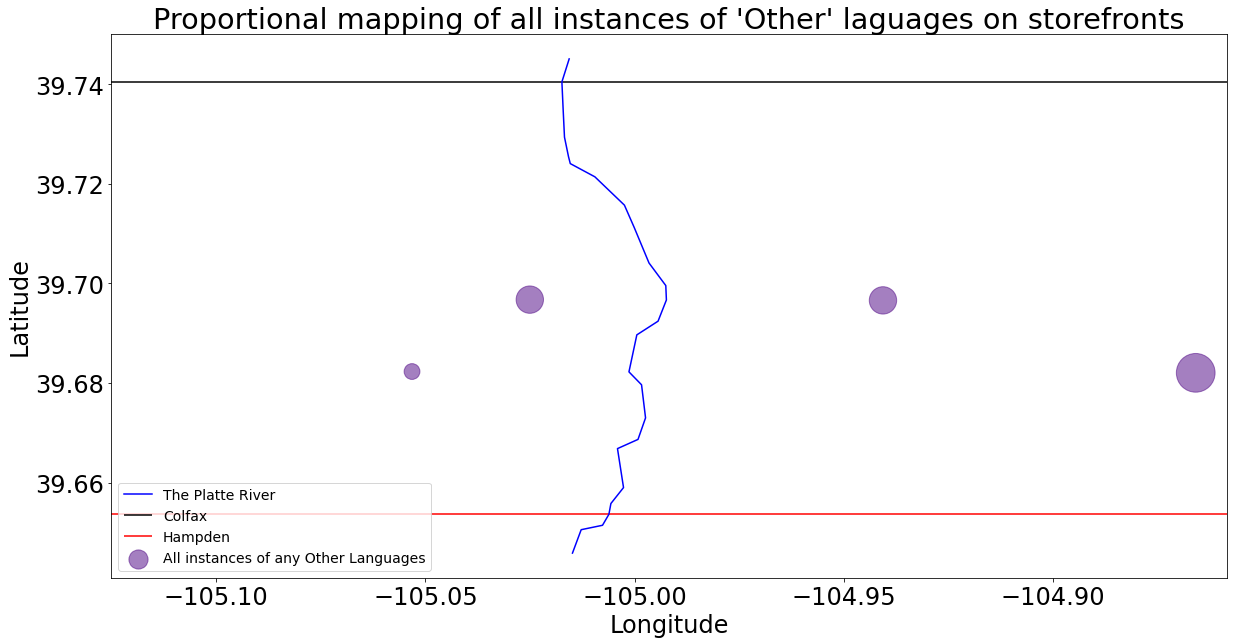

In [116]:
# Plot all instances of any type of Other whatsoever
multiplier = 250
label_name = "All instances of any Other Languages"

plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
plt.xlim(far_west,far_east) # xlim is read (left,right)
plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
plt.scatter(engl_df["longitude"], engl_df["latitude"], ((other_df["maintitle_size"] + other_df["subtitle_size"]) * multiplier), c = "indigo", label = label_name, alpha = 0.5)

plt.title("Proportional mapping of all instances of 'Other' laguages on storefronts")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc = 3, fontsize = 14, markerscale = 0.7)
plt.savefig("otherlang_instances")
plt.show()

# For next session:
* learn how to savefigs
* see if you can't get the bubbles to be translucent and overlap some of them
* do some descriptive statistics (sample size(s), means-per-intersection, etc.)
* start to prepare the presentation itself

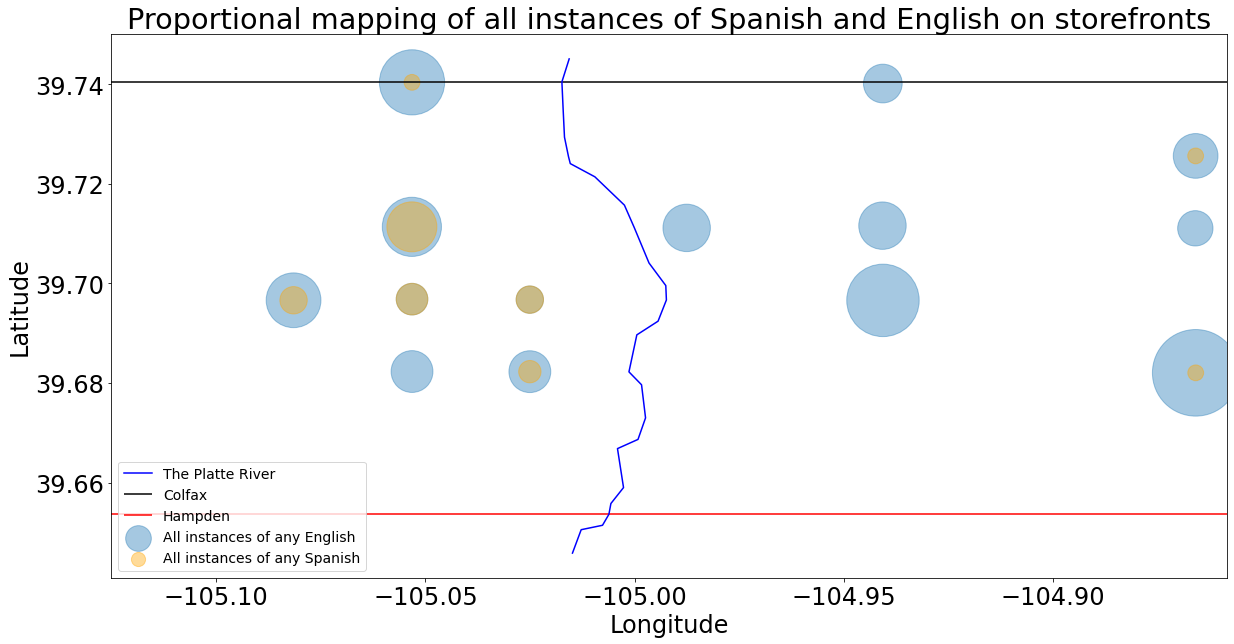

In [69]:
# Plot all instances of any type of English whatsoever
multiplier = 250
alpha = 0.4


plt.plot(platte_long, platte_lat, c = "blue", label = "The Platte River") ## plot the river
plt.xlim(far_west,far_east) # xlim is read (left,right)
plt.hlines(colfax_lat,far_east,far_west, colors = "black", label = "Colfax") ## approx. northern most 'boundary'
plt.hlines(hampden_lat,far_east,far_west, colors = "red", label = "Hampden") ## approx. southern most 'boundary'
    
plt.scatter(engl_df["longitude"], engl_df["latitude"], ((engl_df["maintitle_size"] + engl_df["subtitle_size"]) * multiplier), label = "All instances of any English",
            alpha=alpha)
plt.scatter(span_df["longitude"], span_df["latitude"], ((span_df["maintitle_size"] + span_df["subtitle_size"] +
                                                        spangl_df["maintitle_size"] + spangl_df["subtitle_size"] +
                                                        mix_df["maintitle_size"] + mix_df["subtitle_size"] +
                                                        transl_df["maintitle_size"] + transl_df["subtitle_size"]) * multiplier), c = "orange",
            label = "All instances of any Spanish", alpha=alpha)

plt.title("Proportional mapping of all instances of Spanish and English on storefronts")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc = 3, fontsize = 14, markerscale = 0.4)
plt.savefig("engl_span_instances")
plt.show()

# Descriptive Stats:

In [70]:
# calculate the sample size

# calculate total n
total_sample = len(storefront_data)
print(total_sample)

# calculate total n east and west
east_sample = storefront_data[storefront_data['side_of_platte'].str.contains("east")]
east_sample_size = len(east_sample)
print(east_sample_size)

west_sample = storefront_data[storefront_data['side_of_platte'].str.contains("west")]
west_sample_size = len(west_sample)
print(west_sample_size)

121
68
53


In [71]:
# calculate total number of intersections
total_intersections = storefront_data["intersection"].unique()
total_intersections_count = len(total_intersections)
print(total_intersections_count)

14


In [72]:
# calculate number of unique intersections on the east side
east_intersections = east_sample["intersection"].unique()
east_intersections_count = len(east_intersections)
east_intersections
print(east_intersections_count)

7


In [73]:
# calculate number of unique intersections on the west side
west_intersections = west_sample["intersection"].unique()
west_intersections_count = len(west_intersections)
west_intersections
print(west_intersections_count)

7


In [74]:
# calculate mean storefronts per instersection

total_mean_per_intersection = total_sample/total_intersections_count
print(total_mean_per_intersection)

east_mean_per_intersection = east_sample_size/east_intersections_count
print(east_mean_per_intersection)

west_mean_per_intersection = west_sample_size/west_intersections_count
print(west_mean_per_intersection)

8.642857142857142
9.714285714285714
7.571428571428571


In [82]:
# calculate total instances of engl maintitles

east_engl_maintitle = east_sample[east_sample["maintitle_code"].str.contains("engl", na = False)]
east_engl_maintitle_count = len(east_engl_maintitle)
print(east_engl_maintitle_count)

west_engl_maintitle = west_sample[west_sample["maintitle_code"].str.contains("engl", na = False)]
west_engl_maintitle_count = len(west_engl_maintitle)
print(west_engl_maintitle_count)

# calculate the proportion of maintitle signs that are in strict English

east_engl_maintitle_proportion = east_engl_maintitle_count / east_sample_size
print(east_engl_maintitle_proportion)

west_engl_maintitle_proportion = west_engl_maintitle_count / west_sample_size
print(west_engl_maintitle_proportion)

# calculate total instances of engl subtitles

east_engl_subtitle = east_sample[east_sample["subtitle_code"].str.contains("engl", na = False)]
east_engl_subtitle_count = len(east_engl_subtitle)
print(east_engl_subtitle_count)

west_engl_subtitle = west_sample[west_sample["subtitle_code"].str.contains("engl", na = False)]
west_engl_subtitle_count = len(west_engl_subtitle)
print(west_engl_subtitle_count)

59
33
0.8676470588235294
0.6226415094339622
29
31


In [83]:
# calculate total instances of spangl maintitles

east_spangl_maintitle = east_sample[east_sample["maintitle_code"].str.contains("spangl", na = False)]
east_spangl_maintitle_count = len(east_spangl_maintitle)
print(east_spangl_maintitle_count)

west_spangl_maintitle = west_sample[west_sample["maintitle_code"].str.contains("spangl", na = False)]
west_spangl_maintitle_count = len(west_spangl_maintitle)
print(west_spangl_maintitle_count)

# calculate the proportion of maintitle signs that are in strict spanglish

east_spangl_maintitle_proportion = east_spangl_maintitle_count / east_sample_size
print(east_spangl_maintitle_proportion)

west_spangl_maintitle_proportion = west_spangl_maintitle_count / west_sample_size
print(west_spangl_maintitle_proportion)

0
7
0.0
0.1320754716981132


In [289]:
def descriptive_stats(intersections_dataframe, lang_code):
    """
    """
    # calculate total n
    total_sample_size = len(intersections_dataframe)
    print("There are " + str(total_sample) + " total entries in this dataset (sample size).")

    # calculate total n east and west
    east_sample = intersections_dataframe[intersections_dataframe['side_of_platte'].str.contains("east")]
    east_sample_size = len(east_sample)
    print("There are " + str(east_sample_size) + " total entries in on the East end of this dataset (sample size).")

    west_sample = intersections_dataframe[intersections_dataframe['side_of_platte'].str.contains("west")]
    west_sample_size = len(west_sample)
    print("There are " + str(west_sample_size) + " total entries in on the East end of this dataset (sample size).")
    
    # calculate total instances of spangl maintitles

    east_maintitle = east_sample[east_sample["maintitle_code"].str.contains(lang_code, na = False)]
    east_maintitle_count = len(east_maintitle)
    print("There are " + str(east_maintitle_count) + " total maintitle entries of language type: " + lang_code + " on the East end.")

    west_maintitle = west_sample[west_sample["maintitle_code"].str.contains(lang_code, na = False)]
    west_maintitle_count = len(west_maintitle)
    print("There are " + str(west_maintitle_count) + " total maintitle entries of language type: " + lang_code + " on the West end.")

    # calculate the proportion of maintitle signs that are in strict spanglish

    east_maintitle_proportion = east_maintitle_count / east_sample_size
    print("The proportion of " + lang_code + " maintitles on the East end is: " + str(east_maintitle_proportion))

    west_maintitle_proportion = west_maintitle_count / west_sample_size
    print("The proportion of " + lang_code + " maintitles on the west end is: " + str(west_maintitle_proportion))
    
    # calculate data for subtitles
    
    east_sample_sub = east_sample[east_sample['subtitle_code'].str.contains("engl|span|spangl|mix|transl|other", na = False)]
    east_sample_sub_size = len(east_sample_sub)
    print("There are a total of " + str(east_sample_sub_size) + " subtitles on the East end.")
    west_sample_sub = west_sample[west_sample['subtitle_code'].str.contains("engl|span|spangl|mix|transl|other", na = False)]
    west_sample_sub_size = len(west_sample_sub)
    print("There are a total of " + str(west_sample_sub_size) + " subitles on the West end.")
    
    
    
    east_subtitle = east_sample_sub[east_sample_sub["subtitle_code"].str.contains(lang_code, na = False)]
    east_subtitle_size = len(east_subtitle)
    print("There are " + str(east_subtitle_size) + " total subtitle entries of language type: " + lang_code + " on the East end.")

    west_subtitle = west_sample_sub[west_sample_sub["subtitle_code"].str.contains(lang_code, na = False)]
    west_subtitle_size = len(west_subtitle)
    print("There are " + str(west_subtitle_size) + " total subtitle entries of language type: " + lang_code + " on the West end.")
    
    # calculate the proportion of maintitle signs that are in strict spanglish

    east_subtitle_proportion = east_subtitle_size / east_sample_sub_size
    print("The proportion of " + lang_code + " subtitles on the East end is: " + str(east_subtitle_proportion))

    west_subtitle_proportion = west_subtitle_size / west_sample_sub_size
    print("The proportion of " + lang_code + " subtitles on the west end is: " + str(west_subtitle_proportion))
    

In [291]:
descriptive_stats(storefront_data, "span|spangl|mix|transl")

There are 121 total entries in this dataset (sample size).
There are 68 total entries in on the East end of this dataset (sample size).
There are 53 total entries in on the East end of this dataset (sample size).
There are 2 total maintitle entries of language type: span|spangl|mix|transl on the East end.
There are 14 total maintitle entries of language type: span|spangl|mix|transl on the West end.
The proportion of span|spangl|mix|transl maintitles on the East end is: 0.029411764705882353
The proportion of span|spangl|mix|transl maintitles on the west end is: 0.2641509433962264
There are a total of 31 subtitles on the East end.
There are a total of 40 subitles on the West end.
There are 0 total subtitle entries of language type: span|spangl|mix|transl on the East end.
There are 9 total subtitle entries of language type: span|spangl|mix|transl on the West end.
The proportion of span|spangl|mix|transl subtitles on the East end is: 0.0
The proportion of span|spangl|mix|transl subtitles o

# So, it seems like what we need to do is: figure out how to bubble plot these points by intersection category & frequency; find two points that are similar but separate to be the centers of any 4 bubbles (maybe the corner of any of the intersections would be a great way of separating the 3-4 categories); then we have to plot a bunch of graphs

# Also! We need to finish Data collection (1-2 more on the West side and then an equal amount on the East side) then proceed with some Analysis

In [ ]:
def concat_lang_size(storefront_data, intersection_coord_df, title_type, lang_code, column_name):

In [212]:
west_coordinates = intersection_coord_df[intersection_coord_df["intersection"].str.contains
                                         ("Sheridan_&_Mississippi|Federal_&_Jewell|Sheridan_&_Alameda|Sheridan_&_Colfax|Federal_&_Mississippi|Sheridan_&_Jewell|Wadsworth_&_Mississippi")]
east_coordinates =intersection_coord_df[~intersection_coord_df["intersection"].str.contains
                                         ("Sheridan_&_Mississippi|Federal_&_Jewell|Sheridan_&_Alameda|Sheridan_&_Colfax|Federal_&_Mississippi|Sheridan_&_Jewell|Wadsworth_&_Mississippi")]
east_coordinates= east_coordinates.reset_index()

,index,intersection,latitude,longitude
0,7,Colorado_&_Mississippi,39.696583,-104.940655
1,8,Colorado_&_Colfax,39.740133,-104.940689
2,9,Havana_&_Sixth,39.725597,-104.865922
3,10,Broadway_&_Alameda,39.711142,-104.987573
4,11,Havana_&_Alameda,39.711058,-104.865997
5,12,Colorado_&_Alameda,39.711592,-104.940774
6,13,Havana_&_Jewell,39.682033,-104.865903


,index,intersection,latitude,longitude,maintitle_size,subtitle_size
0,7,Colorado_&_Mississippi,39.696583,-104.940655,0.0,0.0
1,8,Colorado_&_Colfax,39.740133,-104.940689,0.0,0.0
2,9,Havana_&_Sixth,39.725597,-104.865922,1.0,0.0
3,10,Broadway_&_Alameda,39.711142,-104.987573,0.0,0.0
4,11,Havana_&_Alameda,39.711058,-104.865997,0.0,0.0
5,12,Colorado_&_Alameda,39.711592,-104.940774,0.0,0.0
6,13,Havana_&_Jewell,39.682033,-104.865903,1.0,0.0


In [190]:
all_span_maintitle_west = concat_lang_size(west_sample,west_coordinates, "maintitle_code", "span|spangl|transl|mix", "maintitle_size")
all_span_west = concat_lang_size(west_sample, all_span_maintitle_west, "subtitle_code", "span|spangl|transl|mix", "subtitle_size")
all_span_west_ls = list(all_span_west["maintitle_size"] + all_span_west["subtitle_size"])
all_span_west_ls

[4.0, 2.0, 10.0, 1.0, 3.0, 0.0, 3.0]

In [191]:
all_span_maintitle_east = concat_lang_size(east_sample, east_coordinates, "maintitle_code", "span|spangl|transl|mix", "maintitle_size")
all_span_east = concat_lang_size(east_sample, all_span_maintitle_east, "subtitle_code", "span|spangl|transl|mix", "subtitle_size")
all_span_east_ls = list(all_span_east["maintitle_size"] + all_span_east["subtitle_size"])
all_span_east_ls

[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]

In [209]:
west_std = statistics.stdev(all_span_west_ls)
west_mean = statistics.mean(all_span_west_ls)
print("The average number of Spanish uses per intersection on the West side is " + str(west_mean) + " with a std of: " + str(west_std))

The average number of Spanish uses per intersection on the West side is 3.2857142857142856 with a std of: 3.251373336211726


In [210]:
east_std = statistics.stdev(all_span_east_ls)
east_mean = statistics.mean(all_span_east_ls)
print("The average number of Spanish uses per intersection on the east side is " + str(east_mean) + " with a std of: " + str(east_std))

The average number of Spanish uses per intersection on the east side is 0.2857142857142857 with a std of: 0.4879500364742666


In [195]:
stat.ttest_ind(all_span_west_ls, all_span_east_ls, equal_var=False)

Ttest_indResult(statistic=2.4141652455039444, pvalue=0.05051886063870741)

In [254]:
east_sample = east_sample.reset_index()

ValueError: cannot insert level_0, already exists

In [257]:
west_sample = west_sample.reset_index()

In [285]:
count = 0
for i in range(len(east_sample)):
    if east_sample["maintitle_code"][i].str.contains("span|spangl|transl|mix", na= False):
            count = count + 1

AttributeError: 'str' object has no attribute 'str'

In [264]:
east_is_span_maintitle = east_sample["maintitle_code"].str.contains("span|spangl|transl|mix", na = False)
west_is_span_maintitle = west_sample["maintitle_code"].str.contains("span|spangl|transl|mix", na = False)

east_is_span_subtitle = east_sample["subtitle_code"].str.contains("span|spangl|transl|mix", na = False)
west_is_span_subtitle = west_sample["subtitle_code"].str.contains("span|spangl|transl|mix", na = False)

In [287]:
count = 0
for i in range(len(east_is_span_maintitle)):
    if east_is_span_maintitle[i]:
        count = count + 1

count

2

In [272]:
east_span = []
for i in range(len(east_is_span_maintitle)):
    if east_is_span_maintitle[i]:
        east_span.append(1)
    else:
        east_span.append(0)
#for i in range(len(east_is_span_subtitle)):
 #   if east_is_span_subtitle[i]:
  #      east_span[i] = east_span[i] + 1
        
        
east_span

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [273]:
west_span = []
for i in range(len(west_is_span_maintitle)):
    if west_is_span_maintitle[i]:
        west_span.append(1)
    else:
        west_span.append(0)
#for i in range(len(west_is_span_subtitle)):
 #   if west_is_span_subtitle[i]:
  #      west_span[i] = west_span[i] + 1
    
        
west_span

[1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0]

In [274]:
stat.ttest_ind(east_span,west_span, equal_var=False)

Ttest_indResult(statistic=-3.6377037845502644, pvalue=0.0005511487005172228)

In [ ]:
stat.ttest_ind(east_span_sub,west_span, equal_var=False)

In [277]:
statistics.mean(west_span)

0.2641509433962264

In [276]:
statistics.mean(east_span)

0.029411764705882353